# COVID - 19 Project #

The goal os the project is to understand this dataset, gain some insight from it. Finally to utilize sklearn to train some models of covid and make predictions.

the data set is from https://health-infobase.canada.ca/covid-19/ which consists of data related to COVID-19. There are several variables such as number of cases per day, deaths per day, provincial rates and many others. 

# 1) Setup #

Setup we will be importing linbraries, files, preliminary data analysis to get a better understanding of the data we will be working with. 

In [1]:
# import all the libraries, Pandas (data processing)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

#import linear model for linearregression and polynomial
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

#### Import data ####

Download .csv file from https://health-infobase.canada.ca/covid-19/ to follow along.

In [2]:
# open data folder from .cvs file. files are obtained from https://health-infobase.canada.ca/covid-19/
path = 'Covid_19_cleaned_data.csv'

#place data into a DataFrame
df = pd.read_csv(path, index_col='ProvinceNameEN')

df[['Date']] = df[['Date']].astype("datetime64")
df.dtypes

ProvinceID                 int64
Date              datetime64[ns]
ConfirmedCases             int64
ProbableCases              int64
Deceased                   int64
Total                      int64
TotalToday                 int64
dtype: object

#### Data Description #### 

Show data header

In [3]:
df.head()

,ProvinceID,Date,ConfirmedCases,ProbableCases,Deceased,Total,TotalToday
ProvinceNameEN,,,,,,,
Ontario,35,2020-01-31,3,0,0,3,3
British Columbia,59,2020-01-31,1,0,0,1,1
Canada,1,2020-01-31,4,0,0,4,4
Ontario,35,2020-02-08,3,0,0,3,0
British Columbia,59,2020-02-08,4,0,0,4,3


#### Provincial data ####

splinting the data into province wide dataframes. Canada also has its own dataframe. 

In [6]:
BC = df.loc['British Columbia']
AB = df.loc['Alberta']
SK = df.loc['Saskatchewan']
MB = df.loc['Manitoba']
ON = df.loc['Ontario']
QC = df.loc['Quebec']
NL = df.loc['Newfoundland and Labrador']
NB = df.loc['New Brunswick']
NS = df.loc['Nova Scotia']
PE = df.loc['Prince Edward Island']
YT = df.loc['Yukon']
NT = df.loc['Northwest Territories']
NU = df.loc['Nunavut']
CN = df.loc['Canada']

# 3) Preliminary Data Analysis #

Using plots will allow us to get a visual understanding to the data that we are working with. 

This plot is a simple linear plot of Number of Confirmed cases per province per day.

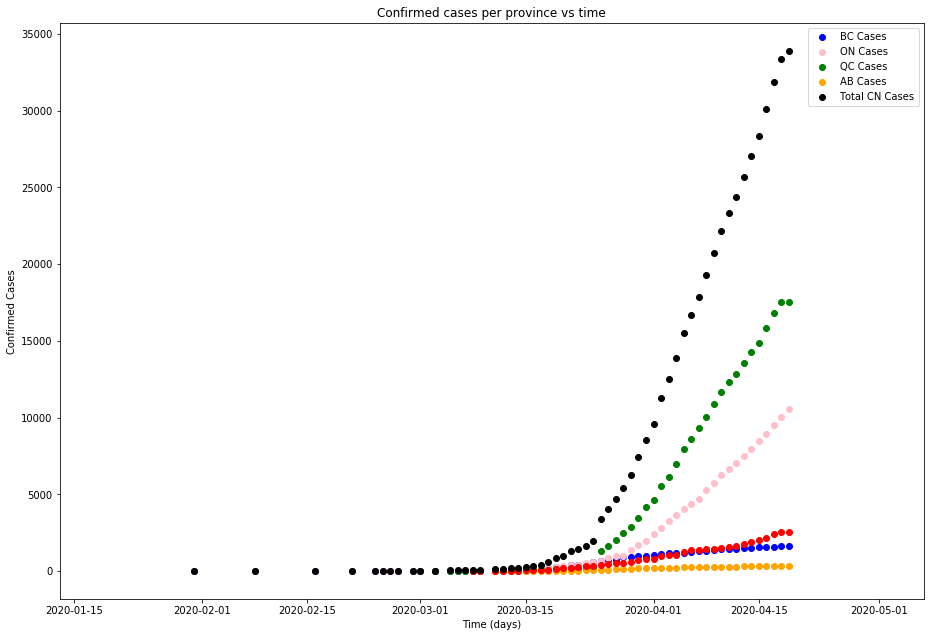

In [7]:
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
BC_Graph = ax.scatter(BC['Date'], BC['ConfirmedCases'], color='blue')
BC_Graph.set_label('BC Cases')
ON_Graph = ax.scatter(ON['Date'], ON['ConfirmedCases'], color='pink')
ON_Graph.set_label('ON Cases')
QC_Graph = ax.scatter(QC['Date'], QC['ConfirmedCases'], color='g')
QC_Graph.set_label('QC Cases')
SK_Graph = ax.scatter(SK['Date'], SK['ConfirmedCases'], color='orange')
SK_Graph.set_label('SK Cases')
AB_Graph = ax.scatter(AB['Date'], AB['ConfirmedCases'], color='red')
SK_Graph.set_label('AB Cases')
CN_Graph = ax.scatter(CN['Date'], CN['ConfirmedCases'], color='black')
CN_Graph.set_label('Total CN Cases')



ax.set_xlabel('Time (days)')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Confirmed cases per province vs time')
ax.legend()
plt.show()

#### Plot #

logrithmic plot. This is more important as number of cases increase at this time the linear plot works to convey the information of the growth rate of covid.

C:\Users\Paul Kot\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


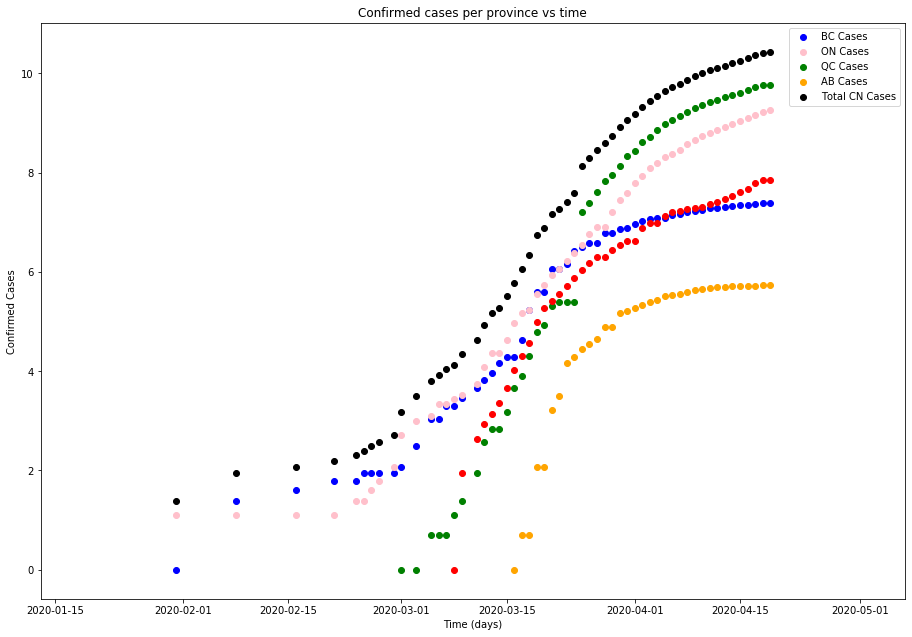

In [8]:
#develop logrithmic plot
fig1=plt.figure()
ax1=fig1.add_axes([0,0,2,2])
BC_Graph = ax1.scatter(BC['Date'], np.log(BC['ConfirmedCases']), color='blue')
BC_Graph.set_label('BC Cases')
ON_Graph = ax1.scatter(ON['Date'], np.log(ON['ConfirmedCases']), color='pink')
ON_Graph.set_label('ON Cases')
QC_Graph = ax1.scatter(QC['Date'], np.log(QC['ConfirmedCases']), color='g')
QC_Graph.set_label('QC Cases')
SK_Graph = ax1.scatter(SK['Date'], np.log(SK['ConfirmedCases']), color='orange')
SK_Graph.set_label('SK Cases')
AB_Graph = ax1.scatter(AB['Date'], np.log(AB['ConfirmedCases']), color='red')
SK_Graph.set_label('AB Cases')
CN_Graph = ax1.scatter(CN['Date'], np.log(CN['ConfirmedCases']), color='black')
CN_Graph.set_label('Total CN Cases')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Confirmed Cases')
ax1.set_title('Confirmed cases per province vs time')
ax1.legend()
plt.show()

#### Bar Graph  #

This is an interesting plot, because it will highlight how well or how poorly canada is doing. I would like to use this plot and compare it to other countries, but for now that is not the goal of this project. 

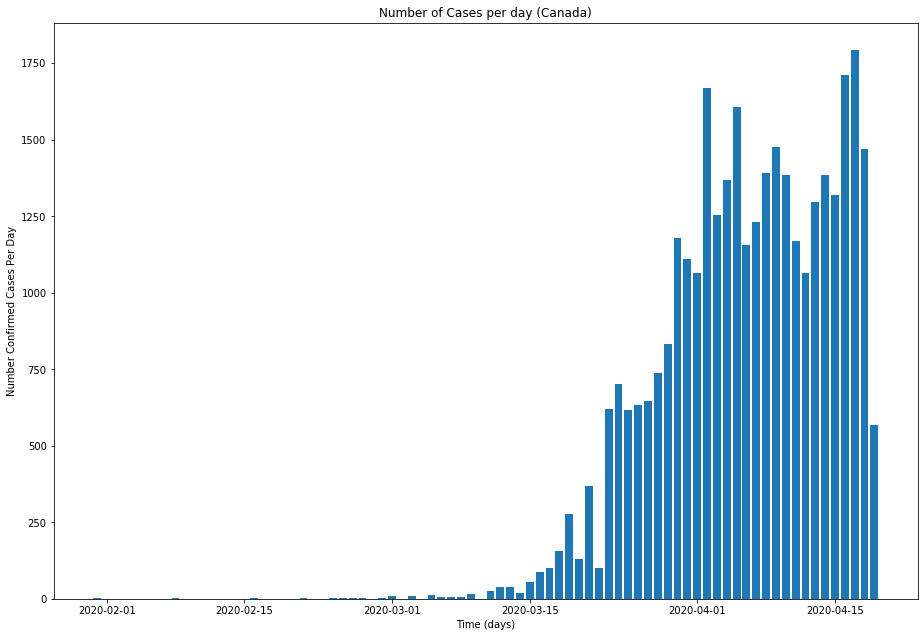

In [9]:

fig2=plt.figure()
ax2=fig2.add_axes([0,0,2,2])
CN_Graph = ax2.bar(CN['Date'], CN['TotalToday'])
CN_Graph.set_label('Total CN Cases')

ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Number Confirmed Cases Per Day')
ax2.set_title('Number of Cases per day (Canada)')

plt.show()

#### VS Bar Graph #

This plot is the most interesting of the bar graphs. This shows how many cases are being recorded per day in Ontario, BC and Saskatchewan. Ontario has been hit by covid very hard especially when compared to BC and SK. 

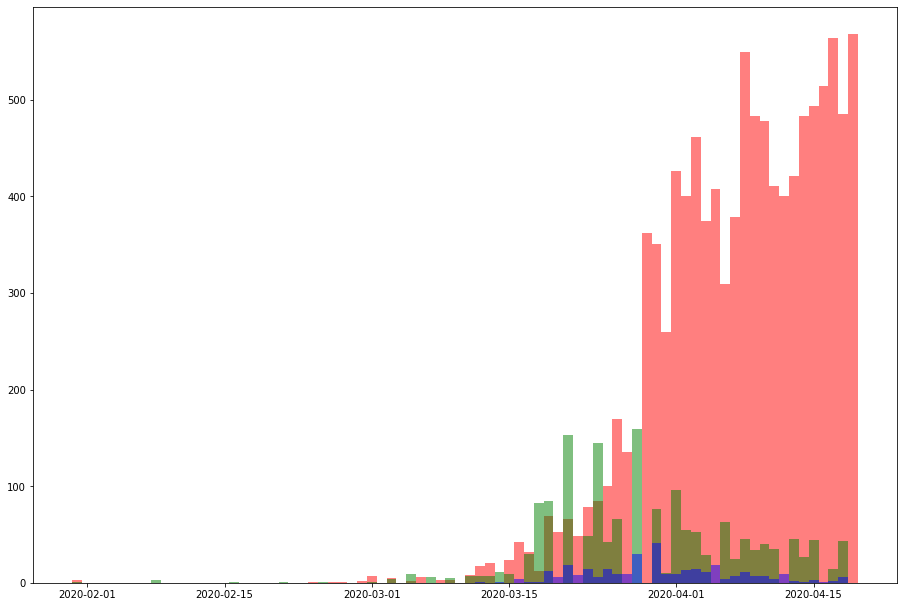

In [10]:
days = len(BC['Date'])
width = 1

fig3, ax3 = plt.subplots()
ax3 = fig3.add_axes([0,0,2,2])
#CN_Graph = ax3.bar(CN['Date'], CN['Total-Today'])
CN_Graph.set_label('Total CN Cases')
ON_Graph = ax3.bar(ON['Date'],ON['TotalToday'],width,label='ON',ls='dashed', alpha = 0.5, lw=1, color= 'r')
BC_Graph = ax3.bar(BC['Date'],BC['TotalToday'],width,label='ON',ls='dashed', alpha = 0.5, lw=1, color= 'g')
SK_Graph = ax3.bar(SK['Date'],SK['TotalToday'],width,label='ON',ls='dashed', alpha = 0.5, lw=1, color= 'b')

plt.show()
